## Time series Forecasting AR model

In [1]:
#Import packages
import pandas as pd
from matplotlib import pyplot
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from pandas.tools.plotting import *
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
#impor dataset
series = pd.Series.from_csv('daily-minimum-temperatures.csv', header=0)
print(series.head())


Date
1981-01-01    20.7
1981-02-01    17.9
1981-03-01    18.8
1981-04-01    14.6
1981-05-01    15.8
Name: temp, dtype: float64


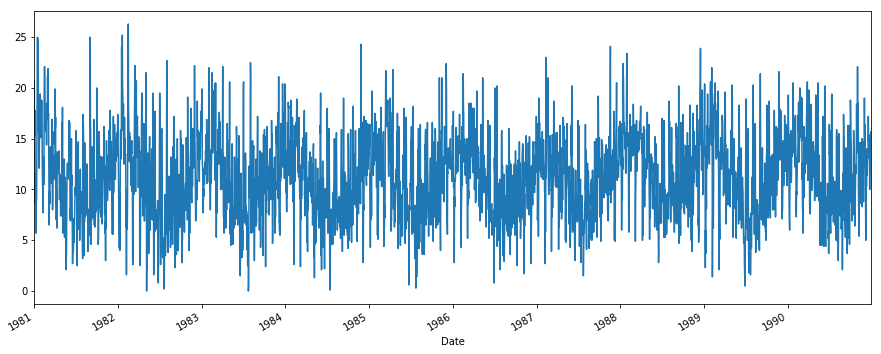

In [4]:
#Line plot 
series.plot()
pyplot.show()

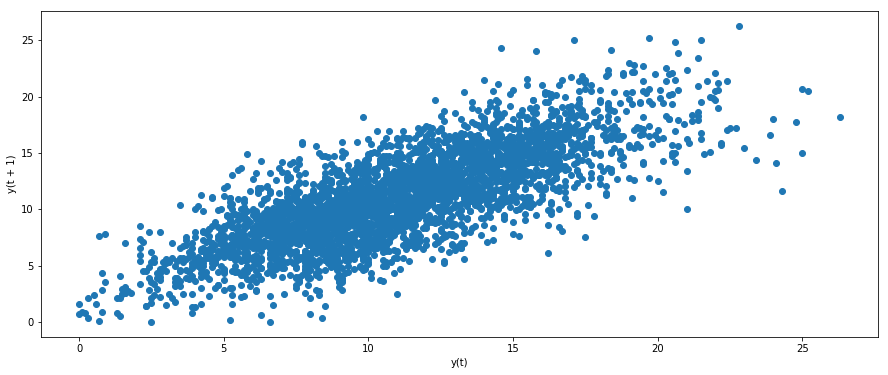

In [5]:
#check for auto correlation using scatter plot

lag_plot(series)
pyplot.show()

In [6]:
#Creating lagged version
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
result

,t-1,t+1
t-1,1.00000,0.77487
t+1,0.77487,1.00000


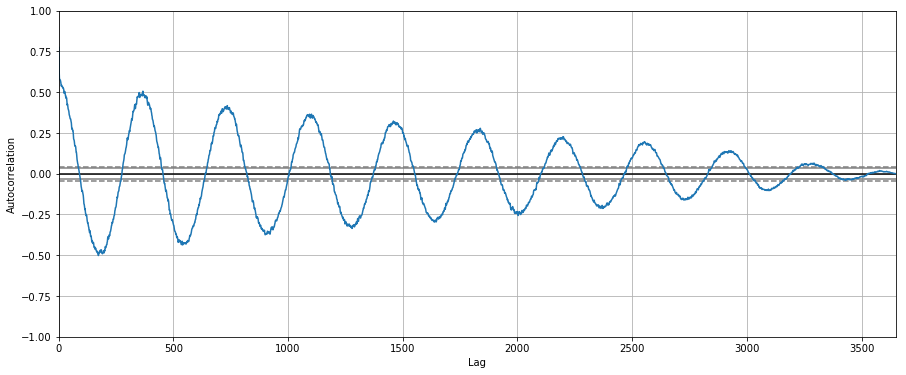

In [7]:
autocorrelation_plot(series)
pyplot.show()

In [11]:

# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-10], X[len(X)-10:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

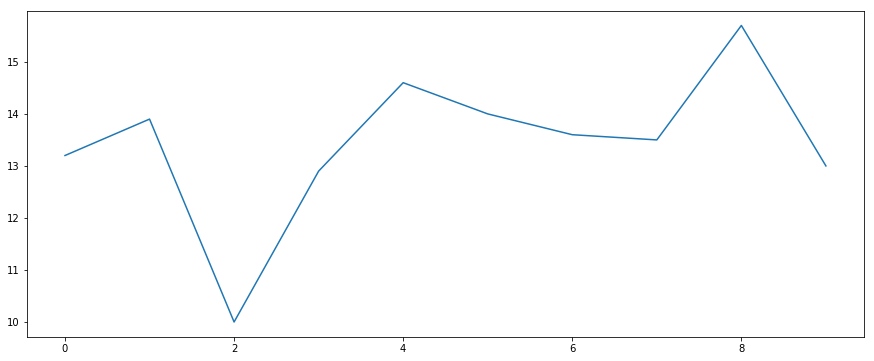

In [12]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

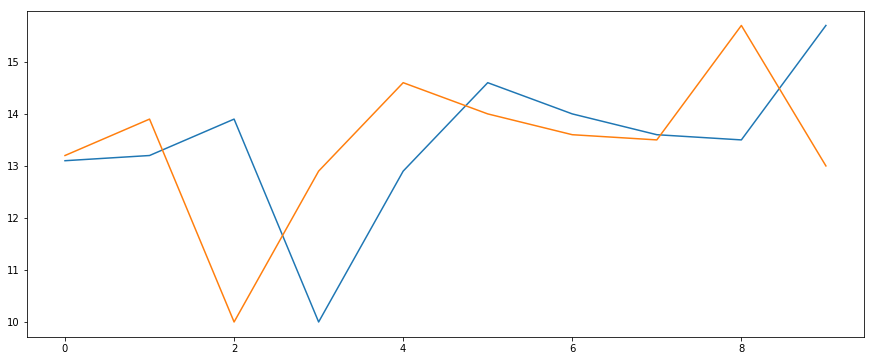

In [14]:
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Lag: 29
Coefficients: [  5.54721196e-01   5.88620025e-01  -9.08403363e-02   4.78861753e-02
   4.05769285e-02   3.88623107e-02   2.68384674e-02   4.43339081e-02
   1.27665664e-02   3.74716889e-02  -8.36039835e-04   4.10764895e-03
   1.90353690e-02   2.63436298e-02   1.07837869e-04   2.50828664e-02
   7.15512099e-03   1.05994073e-02   3.45001331e-02  -8.35659965e-03
   2.41812672e-02   1.92127461e-02   1.17692672e-02  -1.83870223e-02
  -2.18285644e-03   1.67650213e-02   2.04832214e-02   8.41555760e-03
   6.69652217e-03  -1.51357703e-03]
predicted=13.282297, expected=13.200000
predicted=13.797503, expected=13.900000
predicted=14.139966, expected=10.000000
predicted=14.327526, expected=12.900000
predicted=14.131774, expected=14.600000
predicted=14.146867, expected=14.000000
predicted=13.787522, expected=13.600000
predicted=13.667185, expected=13.500000
predicted=13.706680, expected=15.700000
predicted=13.793491, expected=13.000000
Test MSE: 2.410


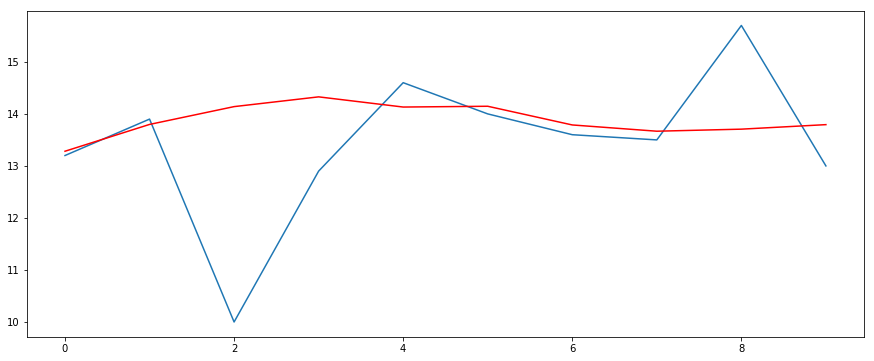

In [15]:


# split dataset
X = series.values
train, test = X[1:len(X)-10], X[len(X)-10:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [16]:
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=13.282297, expected=13.200000
predicted=13.749061, expected=13.900000
predicted=14.207773, expected=10.000000
predicted=11.877407, expected=12.900000
predicted=13.669149, expected=14.600000
predicted=14.354865, expected=14.000000
predicted=13.423968, expected=13.600000
predicted=13.372858, expected=13.500000
predicted=13.474179, expected=15.700000
predicted=14.761615, expected=13.000000
Test MSE: 2.788


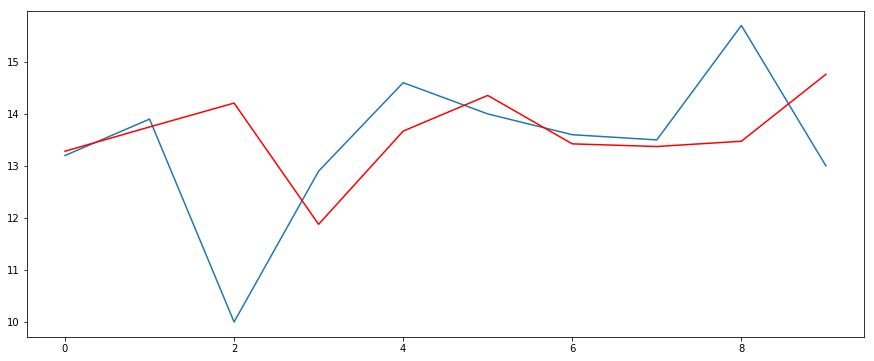

In [18]:

# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()